In [ ]:
pip install tensorflow

In [ ]:
pip install keras_tuner

In [ ]:
pip install keras

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from sklearn.preprocessing import LabelBinarizer
import plotly.express as px
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential, Model
from keras.layers import Conv2D
from tensorflow.keras import datasets, layers, models
# Class for colored print statements
class color:
    """
    Sets colors for printouts.
    """
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Printouts color scheme
g_, y_, r_ = color.GREEN, color.YELLOW, color.RED
bd_, un_, end_ = color.BOLD, color.UNDERLINE, color.END
yb_, gb_  = bd_+y_, bd_+g_
gbu_ = gb_+un_
cmap_ = ['#007427', '#B27D12']




In [ ]:
#loading data
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

print(f'{yb_}\n=============================\n    Test and Train Data\n   has been successfully\n          loaded!\n============================={end_}')


    Test and Train Data
   has been successfully
          loaded!


In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
print(f"{yb_}\n{'='*30}\n    Shape of Training Dataset\n{'='*30}\n{train.shape}\n")
print(f"{yb_}\n{'='*30}\n    Shape of Testing Dataset\n{'='*30}\n{test.shape}{end_}")



    Shape of Training Dataset
(27455, 785)


    Shape of Testing Dataset
(7172, 785)


<Axes: >

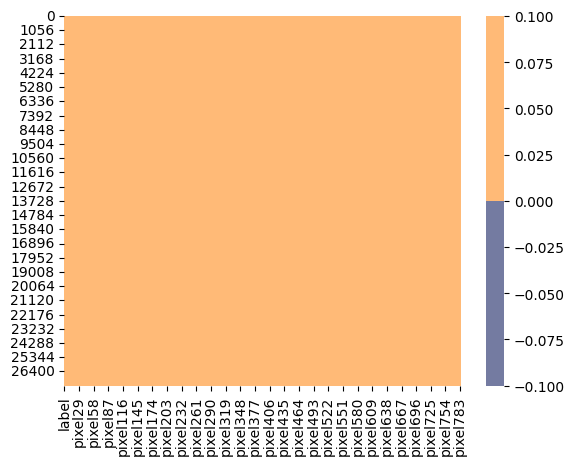

In [ ]:
#from training data
cols =train.columns
colours = ['#747BA1', '#FFBA77']
sns.heatmap(train[cols].isnull(), cmap=sns.color_palette(colours))

<Axes: >

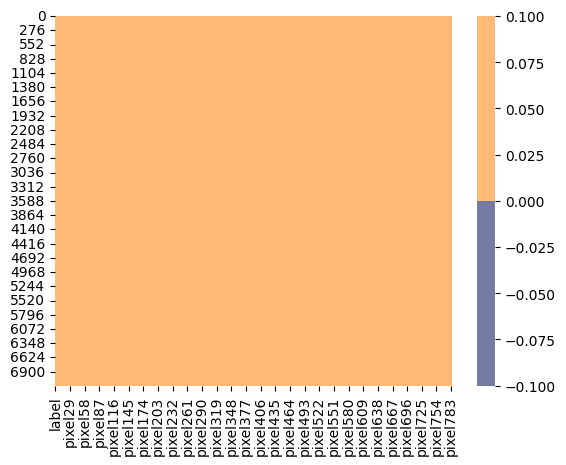

In [ ]:
# from testing data
cols =test.columns
colours = ['#747BA1', '#FFBA77'] # specify the orange  - yellow is missing. blue is not missing.
sns.heatmap(test[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
train = train.drop_duplicates()
test  = test.drop_duplicates()
print(f'{yb_}\nDuplicates has been Removed.{end_}')


Duplicates has been Removed.


In [ ]:
label = train['label']
train = train.drop(['label'],axis=1)
test_label = test['label']
test = test.drop(['label'],axis=1)

In [ ]:
train = train /255
test  = test /255
# numpy arrays
train = np.array(train)
test  = np.array(test)
# 28 by 28
train = train.reshape(train.shape[0],28,28,1)
test  = test.reshape(test.shape[0],28,28,1)

print(f'{yb_}\n Now Data is Normalized.{end_}')


 Now Data is Normalized.


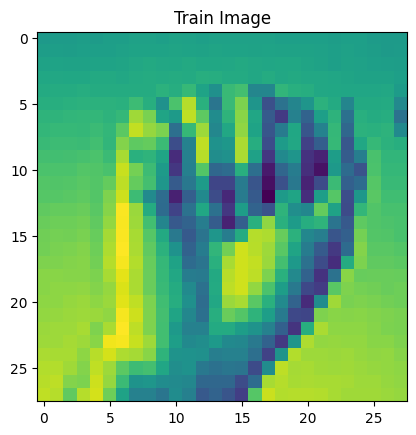

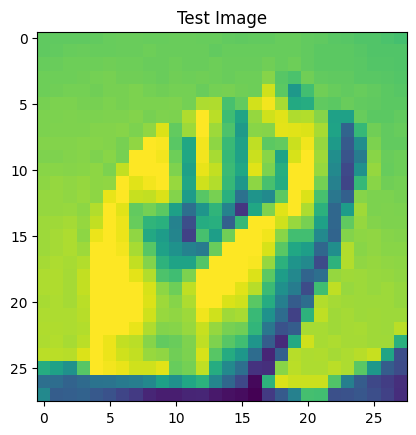

In [ ]:
image_x = random.randint(0,len(test))
plt.imshow(np.reshape(train[image_x],(28,28)))
plt.title('Train Image')
plt.show()
plt.imshow(np.reshape(test[image_x],(28,28)))
plt.title('Test Image')
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),padding ='Same',activation = 'relu',input_shape=(28,28,1)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(layers.Conv2D(128,(3,3),padding ='same',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(layers.Conv2D(128,(3,3),padding ='same',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 dropout_5 (Dropout)         (None, 28, 28, 64)        0         
                                                                 
 batch_normalization_3 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)      

In [ ]:
#adding some layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(25, activation ='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history = model.fit(train,label,epochs=10,validation_data=(test,test_label))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


858/858 [==============================] - 15s 13ms/step - loss: 0.5806 - accuracy: 0.8198 - val_loss: 0.2007 - val_accuracy: 0.9332
Epoch 2/10
858/858 [==============================] - 8s 9ms/step - loss: 0.0411 - accuracy: 0.9866 - val_loss: 0.5922 - val_accuracy: 0.8565
Epoch 3/10
858/858 [==============================] - 6s 7ms/step - loss: 0.0267 - accuracy: 0.9909 - val_loss: 0.1744 - val_accuracy: 0.9428
Epoch 4/10
858/858 [==============================] - 7s 8ms/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.1867 - val_accuracy: 0.9607
Epoch 5/10
858/858 [==============================] - 6s 7ms/step - loss: 0.0210 - accuracy: 0.9935 - val_loss: 0.2087 - val_accuracy: 0.9458
Epoch 6/10
858/858 [==============================] - 6s 7ms/step - loss: 0.0268 - accuracy: 0.9920 - val_loss: 0.4222 - val_accuracy: 0.9371
Epoch 7/10
858/858 [==============================] - 7s 8ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.6591 - val_accuracy: 0.8349
Epoch 8/10
858/

In [ ]:
model.evaluate(test, test_label)

225/225 [==============================] - 1s 3ms/step - loss: 0.2164 - accuracy: 0.9703


[0.21641184389591217, 0.9703011512756348]

In [ ]:
#predection
predictions = model.predict(test)
predictions = np.argmax(predictions, axis = 1)
predictions[5]

225/225 [==============================] - 1s 2ms/step


21

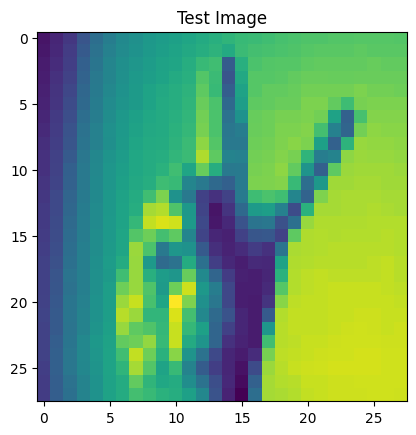

In [ ]:
plt.imshow(np.reshape(test[5],(28,28)))
plt.title('Test Image')
plt.show()

225/225 - 1s - loss: 0.2164 - accuracy: 0.9703 - 771ms/epoch - 3ms/step


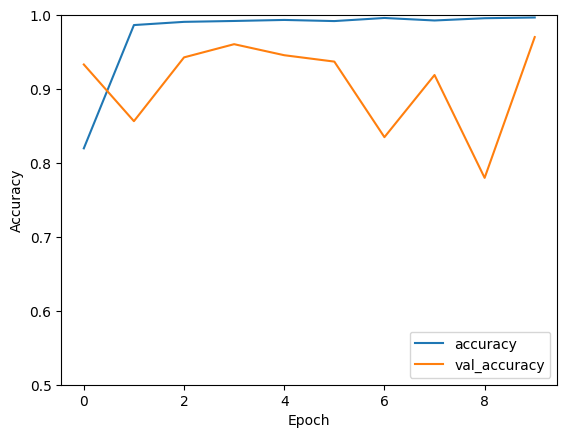

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test,  test_label, verbose=2)

In [ ]:
# print('MODEL ACCURACY = {}%'.format(acc*100))

In [ ]:
from tensorflow.python.saved_model import save

import os

save_dir = os.path.join('/tmp', 'sibarat_project/sibarat_model.h5')
model.save(save_dir)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflowjs
!cd /tmp/sibarat_project
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model /tmp/sibarat_project/sibarat_model.h5 /tmp/tfjs_sibarat

2024-06-19 14:44:31.406460: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 97.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 94.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
    

In [ ]:
pip install tensorrt

  Using cached tensorrt-10.1.0.tar.gz (16 kB)
  Preparing metadata (setup.py) ... done
  Using cached tensorrt-cu12-10.1.0.tar.gz (18 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-10.1.0-py2.py3-none-any.whl size=16332 sha256=6da15640de6061b3b859d833a323c9aea60ab8b9ab380b8a75e2452338c3165a
  Stored in directory: /root/.cache/pip/wheels/f5/55/f5/a1836546c0d92da062e9365a0323953f5e6a0a5f51d46da503
  Created wheel for tensorrt-cu12: filename=tensorrt_cu12-10.1.0-py2.py3-none-any.whl size=17554 sha256=9ebfd83d3574174be4777b8f9821028f34109dc9241fc1f617fd6d277feb1154
  Stored in directory: /root/.cache/pip/wheels/15/96/43/6559f5cfe251d64e7a7b49efb429ae5258eff95976e5f12312
Successfully built tensorrt tensorrt-cu12
